# Vowel Formants Exploration

In [143]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification

In [124]:
files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)
timit.head(20)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


## Vowel Spaces

In [125]:
vows = timit["vowel"]
IPAdict = {"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"}
newVows = []
for i in vows:
    newVows += [IPAdict[i]]
timit['IPA'] = newVows        

In [126]:
timit.head()

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0,IPA
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9,i
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6,æ
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9,ʊ
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5,ɑ
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6,u


# Clean Your Data

### Drop Columns

Many times we are given datasets with more information than we need. Sometimes the datasets have empty values or columns that can actually make your data messier or harder to interpret. Before jumping into analyzing your data is important to clean you data. 

<b>HINT:</b> Drop columns from your dataset that you do not need to analyze.

In [127]:
timit.drop(["speaker", "file", "word","f3","f0"], axis = 1, inplace = True)
timit.head()

,gender,t,vowel,stress,duration,f1,f2,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,u


# Visualizing gender differences

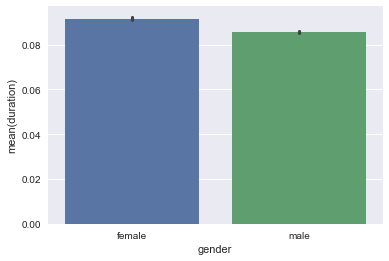

In [147]:
sns.barplot(x="gender", y="duration", data=timit)


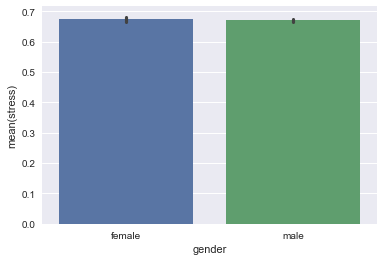

In [149]:
sns.barplot(x="gender", y="stress", data=timit)


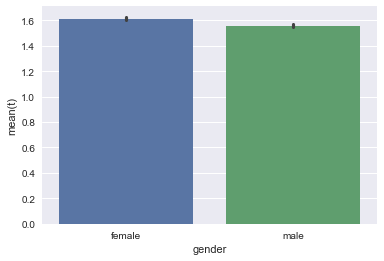

In [150]:
sns.barplot(x="gender", y="t", data=timit)

# Splitting Data by Gender

From the visualizations above you can see that there are some differences in regards to gender. To be able to look at the data more in depth create

In [130]:
fem_data = timit[timit.gender == "female"]
fem_data.head()

,gender,t,vowel,stress,duration,f1,f2,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,u


In [131]:
male_data = timit[timit.gender == "male"]
male_data.head()

,gender,t,vowel,stress,duration,f1,f2,IPA
1761,male,0.2775,IY,1,0.07,473.1,2134.7,i
1762,male,0.4225,AE,1,0.08,453.0,1959.1,æ
1763,male,0.5575,UH,1,0.03,356.3,1890.3,ʊ
1764,male,0.7025,AA,1,0.10,684.3,1291.6,ɑ
1765,male,1.1925,UW,1,0.18,418.7,1329.3,u


# Looking at descriptive data of each IPA vowel separated my gender

In [132]:
fem_data.corr()

,t,stress,duration,f1,f2
t,1.000000,-0.060822,0.085392,0.009795,-0.074119
stress,-0.060822,1.000000,0.328560,0.280071,-0.048959
duration,0.085392,0.328560,1.000000,0.341709,-0.040372
f1,0.009795,0.280071,0.341709,1.000000,-0.284368
f2,-0.074119,-0.048959,-0.040372,-0.284368,1.000000


In [133]:
fem_data.groupby("IPA").mean()

,t,stress,duration,f1,f2
IPA,,,,,
aɪ,1.660937,1.058091,0.142711,770.643430,1829.514938
aʊ,1.485348,1.069565,0.158043,790.090000,1509.722174
eɪ,1.565268,1.125972,0.123297,547.472162,2327.285070
i,1.482767,0.495404,0.098833,476.565119,2328.080699
oʊ,1.269422,1.018303,0.113145,629.733777,1368.230616
u,1.574112,0.946763,0.092489,469.016259,1777.876259
æ,1.455129,1.030968,0.129426,738.424387,1996.115355
ɑ,1.640025,1.034896,0.123097,803.483969,1425.867067
ɔ,1.868351,1.015831,0.123153,723.006201,1256.865303


In [134]:
male_data.corr()

,t,stress,duration,f1,f2
t,1.000000,-0.061223,0.063048,0.035879,-0.059169
stress,-0.061223,1.000000,0.330059,0.239806,-0.023131
duration,0.063048,0.330059,1.000000,0.280321,-0.053999
f1,0.035879,0.239806,0.280321,1.000000,-0.286043
f2,-0.059169,-0.023131,-0.053999,-0.286043,1.000000


In [135]:
male_data.groupby("IPA").mean()

,t,stress,duration,f1,f2
IPA,,,,,
aɪ,1.625130,1.052541,0.130765,644.643861,1529.703712
aʊ,1.432062,1.038911,0.155272,681.533463,1275.313035
eɪ,1.552096,1.151629,0.110194,468.620489,1913.557832
i,1.457285,0.495430,0.089799,407.360082,1927.965473
oʊ,1.221219,1.005867,0.118403,523.859126,1071.855346
u,1.475689,0.954366,0.095549,404.044282,1470.438197
æ,1.408463,1.024074,0.111672,616.132973,1663.036489
ɑ,1.516741,1.032572,0.113981,663.038494,1213.980203
ɔ,1.869116,1.036572,0.123646,598.400109,1028.444541


# Comparing F2 VS F1 color coded by gender

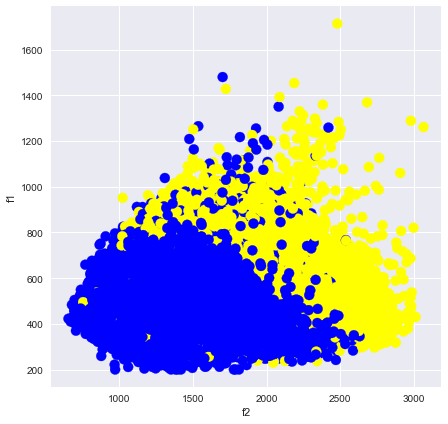

In [136]:
timit.plot(kind = 'scatter', x = 'f2', y = 'f1', c = timit.gender.map({"female": 'yellow', "male": 'blue'}), s = 100, figsize = (7, 7))

# Is there a linear relationship?

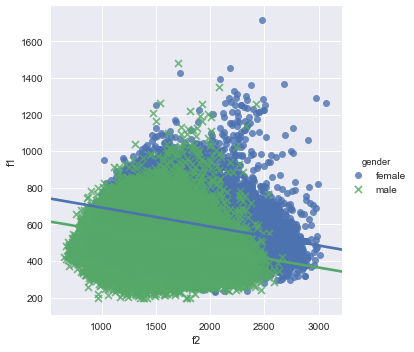

In [141]:
sns.lmplot(x = 'f2', y = 'f1', data = timit, hue="gender", markers=["o", "x"])

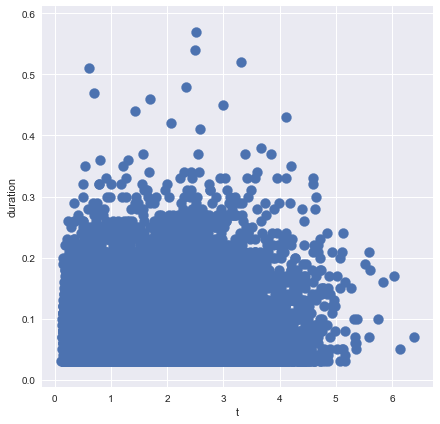

In [155]:
fem_data.plot(kind = 'scatter', x = 't', y = 'duration', s = 100, figsize = (7, 7))

In [153]:
male_data.corr()

,t,stress,duration,f1,f2
t,1.000000,-0.061223,0.063048,0.035879,-0.059169
stress,-0.061223,1.000000,0.330059,0.239806,-0.023131
duration,0.063048,0.330059,1.000000,0.280321,-0.053999
f1,0.035879,0.239806,0.280321,1.000000,-0.286043
f2,-0.059169,-0.023131,-0.053999,-0.286043,1.000000


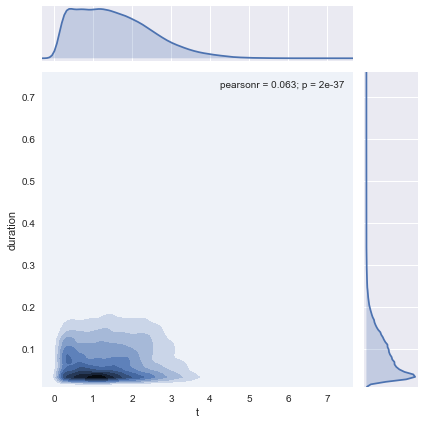

In [203]:
# male_data.plot(kind = 'scatter', x = 't', y = 'duration', s = 100, figsize = (7, 7))
sns.jointplot("t", "duration", data=male_data, kind='kde' )

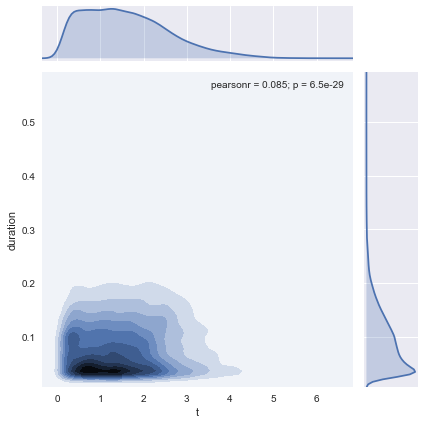

In [204]:
sns.jointplot("t", "duration", data=fem_data, kind='kde' )

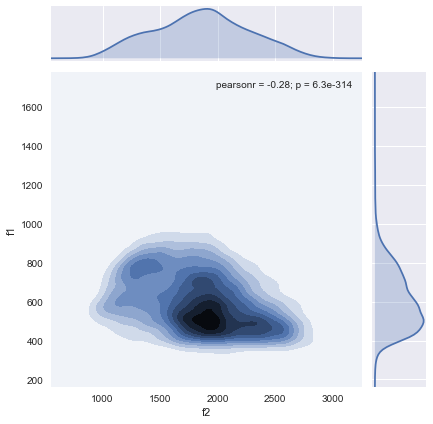

In [190]:
sns.jointplot("f2", "f1", data=fem_data, kind='kde')

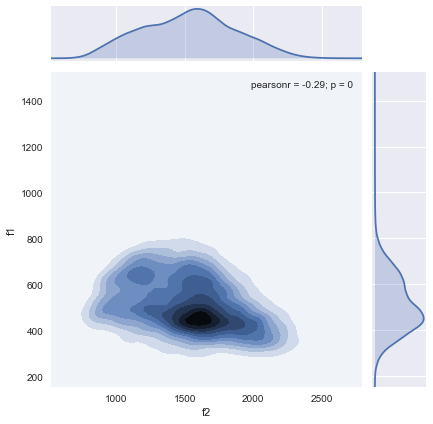

In [187]:
sns.jointplot("f2", "f1", data=male_data, kind='kde')